In [46]:
# import the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

## Data Loading

In [47]:
# Load data
data = pd.read_csv("data/HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Preprocessing

- In the data preprocessing phase, we first examined the shape of the data to understand its dimensions.
- Next, we checked for null values in the dataset and removed them if any found.
- Additionally, we performed a check for duplicate values and replaced them to ensure data integrity.
- To gain insights into the relationships between different variables, we visualized the correlation map using a heatmap. This visualization allowed us to identify patterns and dependencies among the features in the dataset, helping us understand the interplay between various attribute.

In [48]:
# shape of data before drop nulls
data.shape

(3473, 8)

In [49]:
# colums of dataset
data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   int64  
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3473 non-null   float64
 7   Price(USD)  3473 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.0+ KB


In [51]:
data.describe().style.background_gradient(cmap='bone_r')

,Area,Room,Price,Price(USD)
count,3473.000000,3473.000000,3473.000000,3473.000000
mean,106.774547,2.079758,5354621367.719839,178487.378978
std,69.365567,0.758764,8104057560.444856,270135.251944
min,30.000000,0.000000,3600000.000000,120.000000
25%,69.000000,2.000000,1415000000.000000,47166.670000
50%,90.000000,2.000000,2880000000.000000,96000.000000
75%,120.000000,2.000000,6000000000.000000,200000.000000
max,929.000000,5.000000,92400000000.000000,3080000.000000


In [52]:
# count houses with null address
data.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [53]:
# drop 23 houses in dataset without address( their address was null)
data = data.dropna()

# shape of data after drop null address rows
data.shape

(3450, 8)

In [54]:
# checking the duplicate values in the data

duplicate_values = data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate_values')

The data contains 208 duplicate_values


In [55]:
# drop the duplicate values in the dataset
data = data.drop_duplicates()
data.shape

(3242, 8)

In [56]:
'''
data["Parking"].replace(["True", "False"], [1, 0], inplace=True)
data["Warehouse"].replace(["True", "False"], [1, 0], inplace=True)
data["Elevator"].replace(["True", "False"], [1, 0], inplace=True)
data.head()
'''

'\ndata["Parking"].replace(["True", "False"], [1, 0], inplace=True)\ndata["Warehouse"].replace(["True", "False"], [1, 0], inplace=True)\ndata["Elevator"].replace(["True", "False"], [1, 0], inplace=True)\ndata.head()\n'

## Update dollar price to july 2023

In [ ]:
data['Price(USD)'] = data['Price(USD)'].apply(lambda x: x / 30000 * 48000)
# data['Price(USD)'] = pd.to_numeric(data["Price(USD)"] , errors='coerce')
data['Price(USD)']

In [58]:
'''
def update_dollar(x):
    return  (x / 30000) * 48000

data['Price(USD)'].apply(update_dollar)
data['Price(USD)']

'''

"\ndef update_dollar(x):\n    return  (x / 30000) * 48000\n\ndata['Price(USD)'].apply(update_dollar)\ndata['Price(USD)']\n \n"

In [59]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,98666.672
1,60,1,True,True,True,Shahran,1.850000e+09,98666.672
2,79,2,True,True,True,Pardis,5.500000e+08,29333.328
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,48133.328
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,373333.328


In [60]:
data.corr()


C:\Users\fahim\AppData\Local\Temp\ipykernel_14176\1127400319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935,0.720935
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738,0.569738
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761,0.193761
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370,0.109370
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310,0.110310
Price,0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000
Price(USD),0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000


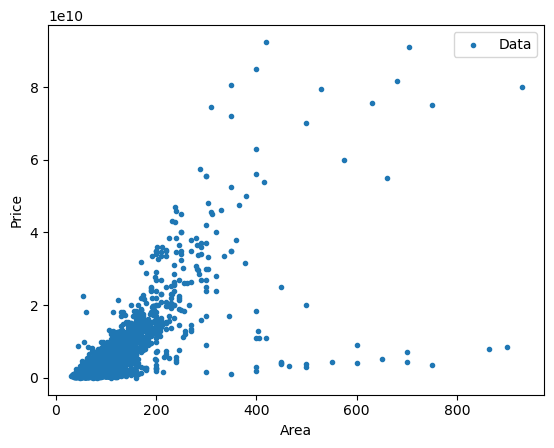

In [61]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Data"])
plt.show()

## Show the address of the 5 most expensive houses

In [1]:
data.sort_values('Price',ascending=False)[['Address']].head(20)

NameError: name 'data' is not defined

In [ ]:
X = np.array(data[["Area"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2431, 1)
(811, 1)
(2431, 1)
(811, 1)


In [64]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

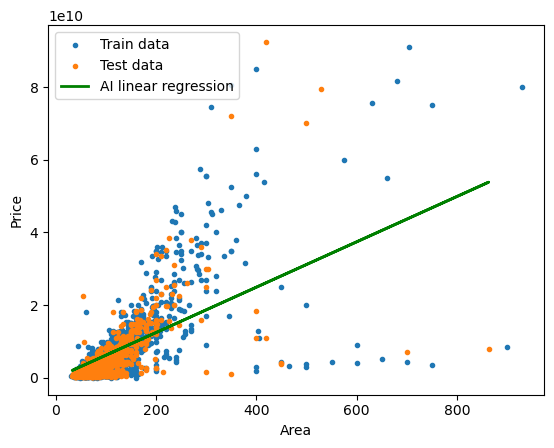

In [65]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='green', lw=2)

plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Train data", "Test data", "AI linear regression"], loc="upper left")
plt.show()

In [66]:
lls.evaluate(X_test, Y_test, 'mae')

3516679690.3333797